In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./data/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [14]:
# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

In [15]:
!pip install mlflow


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [16]:
# Database 
data = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Rows and columns
data.shape

(7043, 21)

## Exploratory data analysis

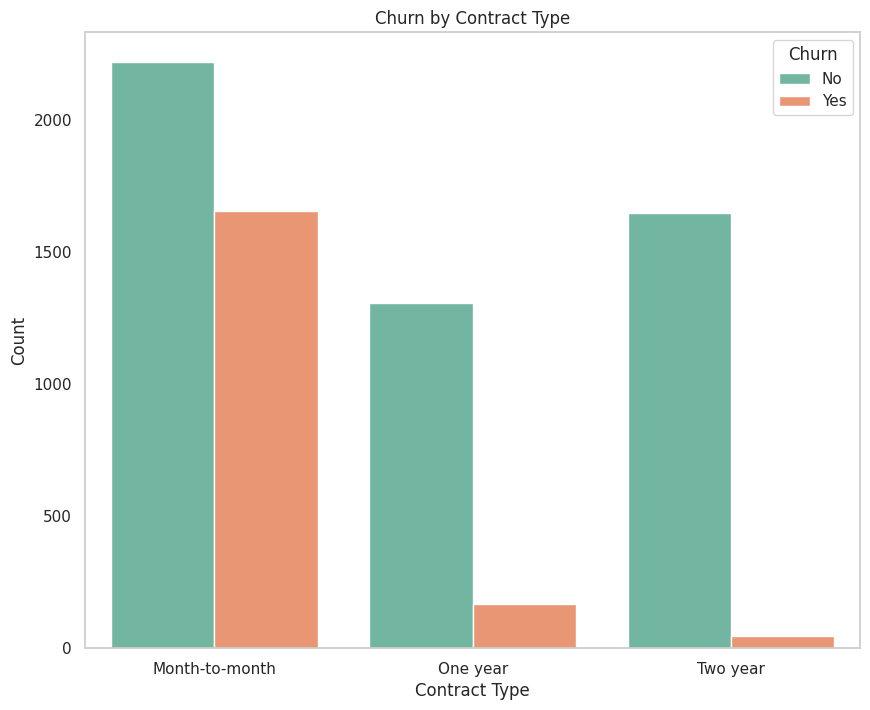

In [18]:
# Churn count by contract type
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.grid(False)
plt.show()

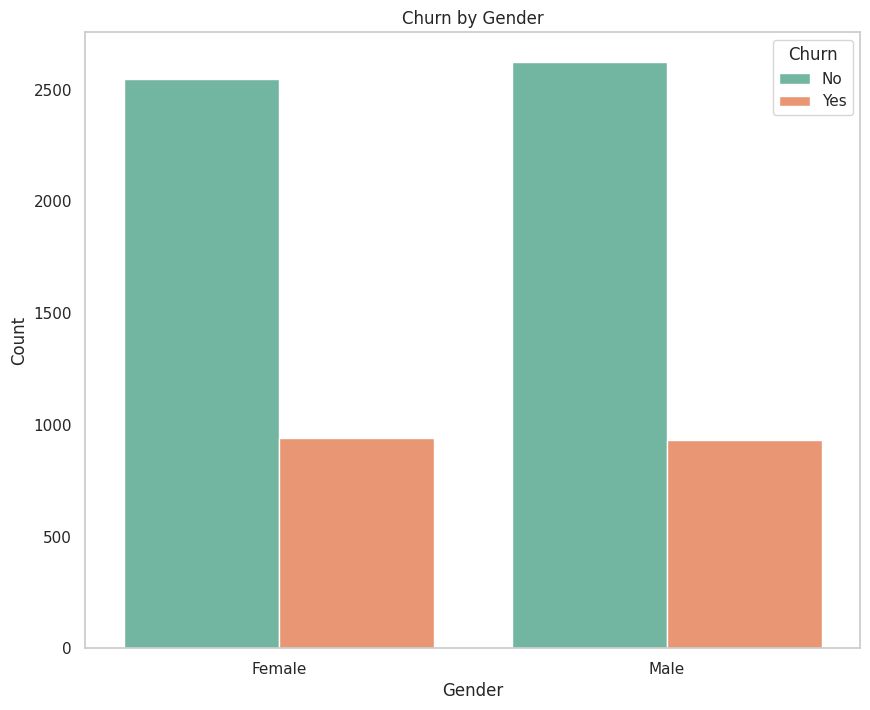

In [19]:
# Churn count by gender
plt.figure(figsize=(10, 8))
sns.countplot(x='gender', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(False)
plt.show()

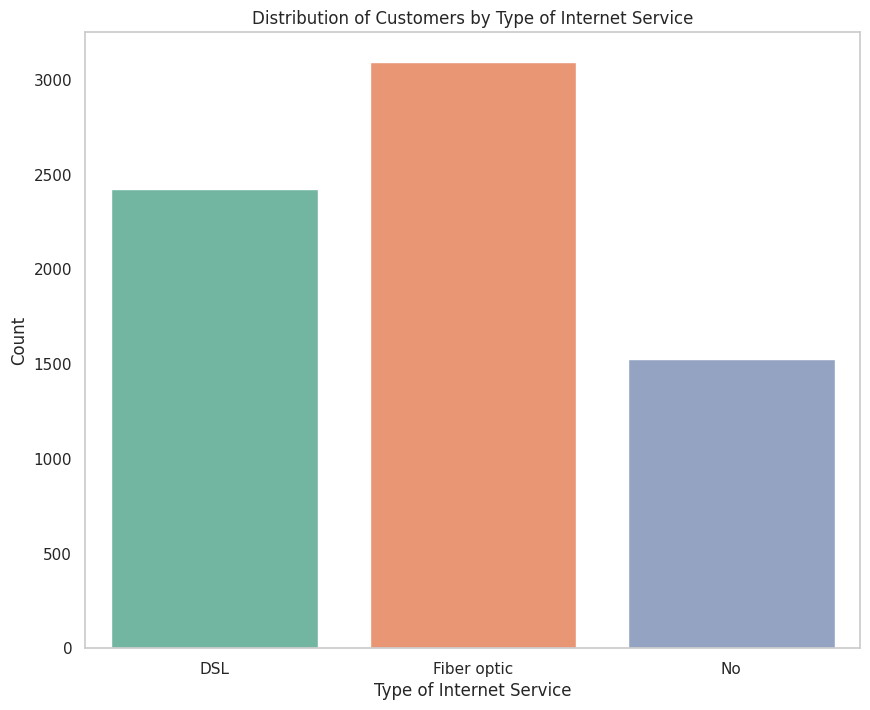

In [20]:
# Distribution of customers by type of internet service
plt.figure(figsize=(10, 8))
sns.countplot(x='InternetService', data=data, palette='Set2')
plt.title('Distribution of Customers by Type of Internet Service')
plt.xlabel('Type of Internet Service')
plt.ylabel('Count')
plt.grid(False)
plt.show()

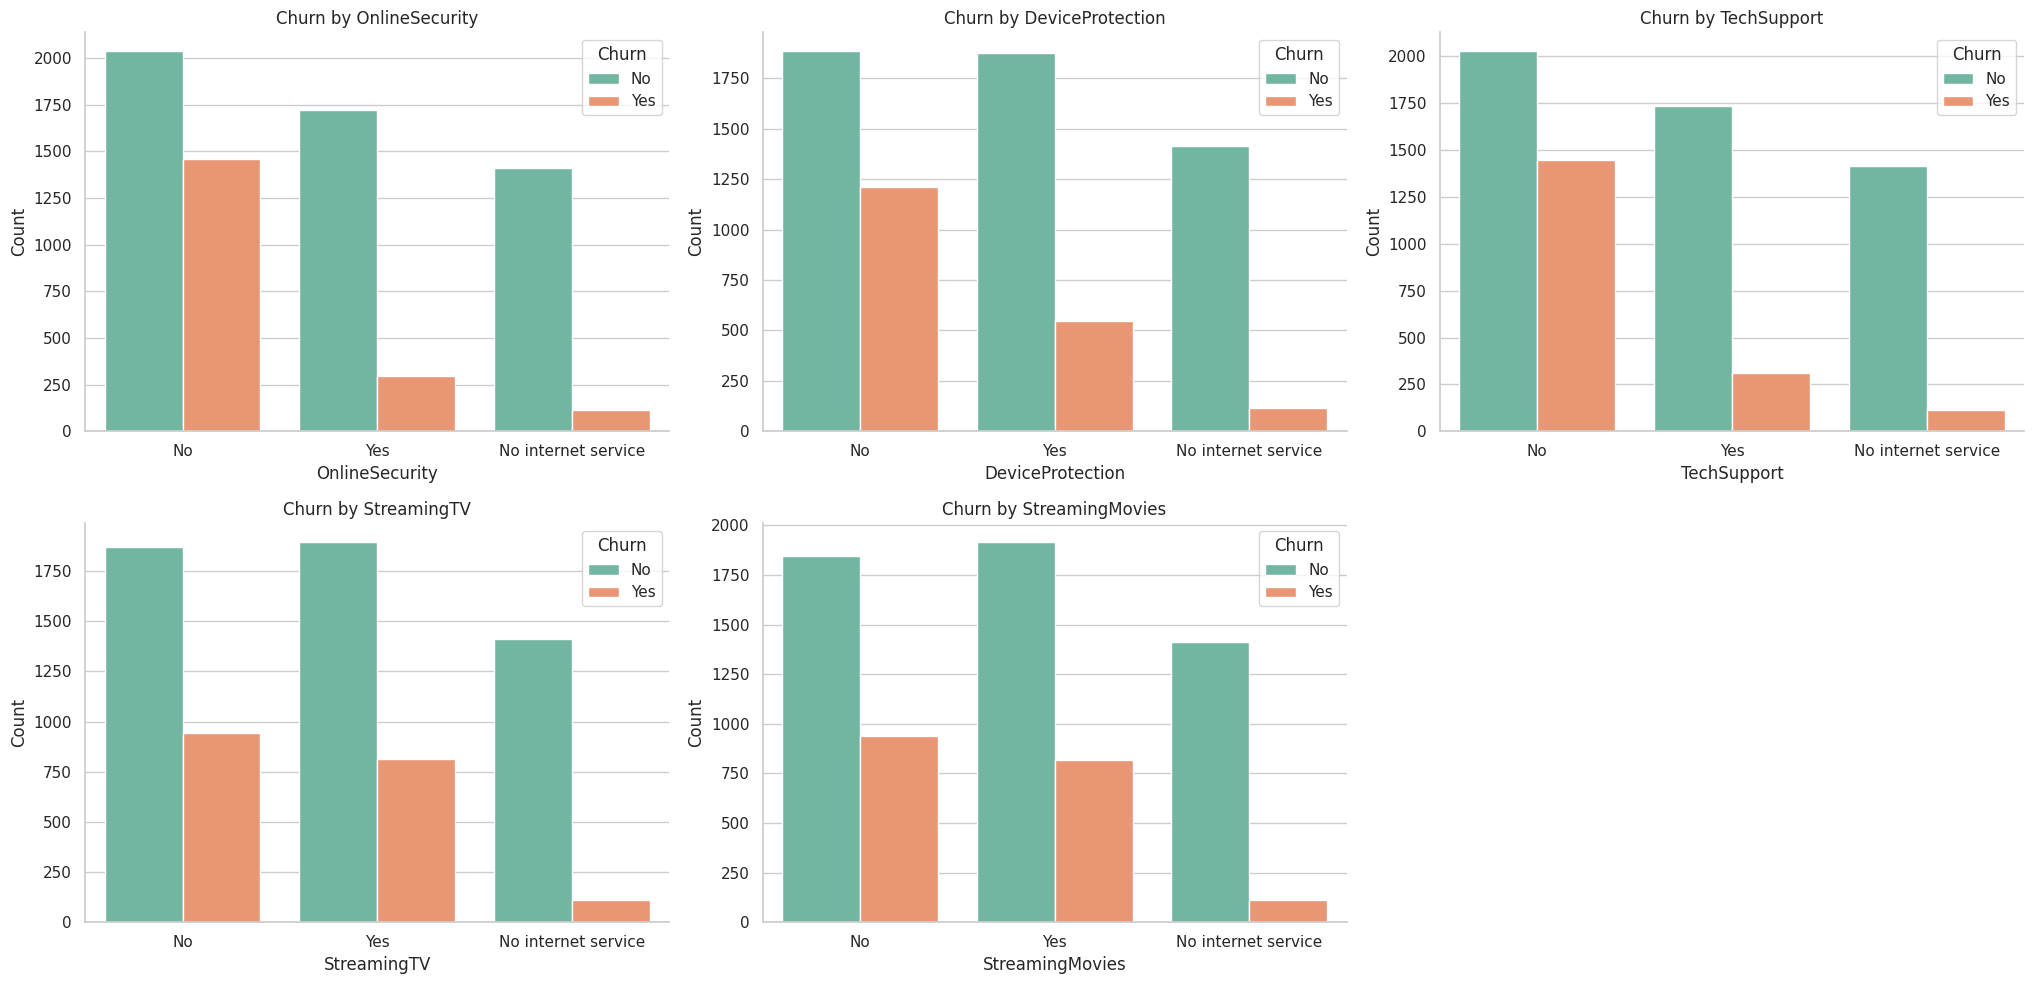

In [21]:
# Churn count by additional services
additional_services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20.5, 10))
for i, service in enumerate(additional_services, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=service, hue='Churn', data=data, palette='Set2')
    plt.title(f'Churn by {service}')
    plt.xlabel(service)
    plt.ylabel('Count')
    sns.despine() # Remove background lines
    plt.tight_layout()
plt.show()

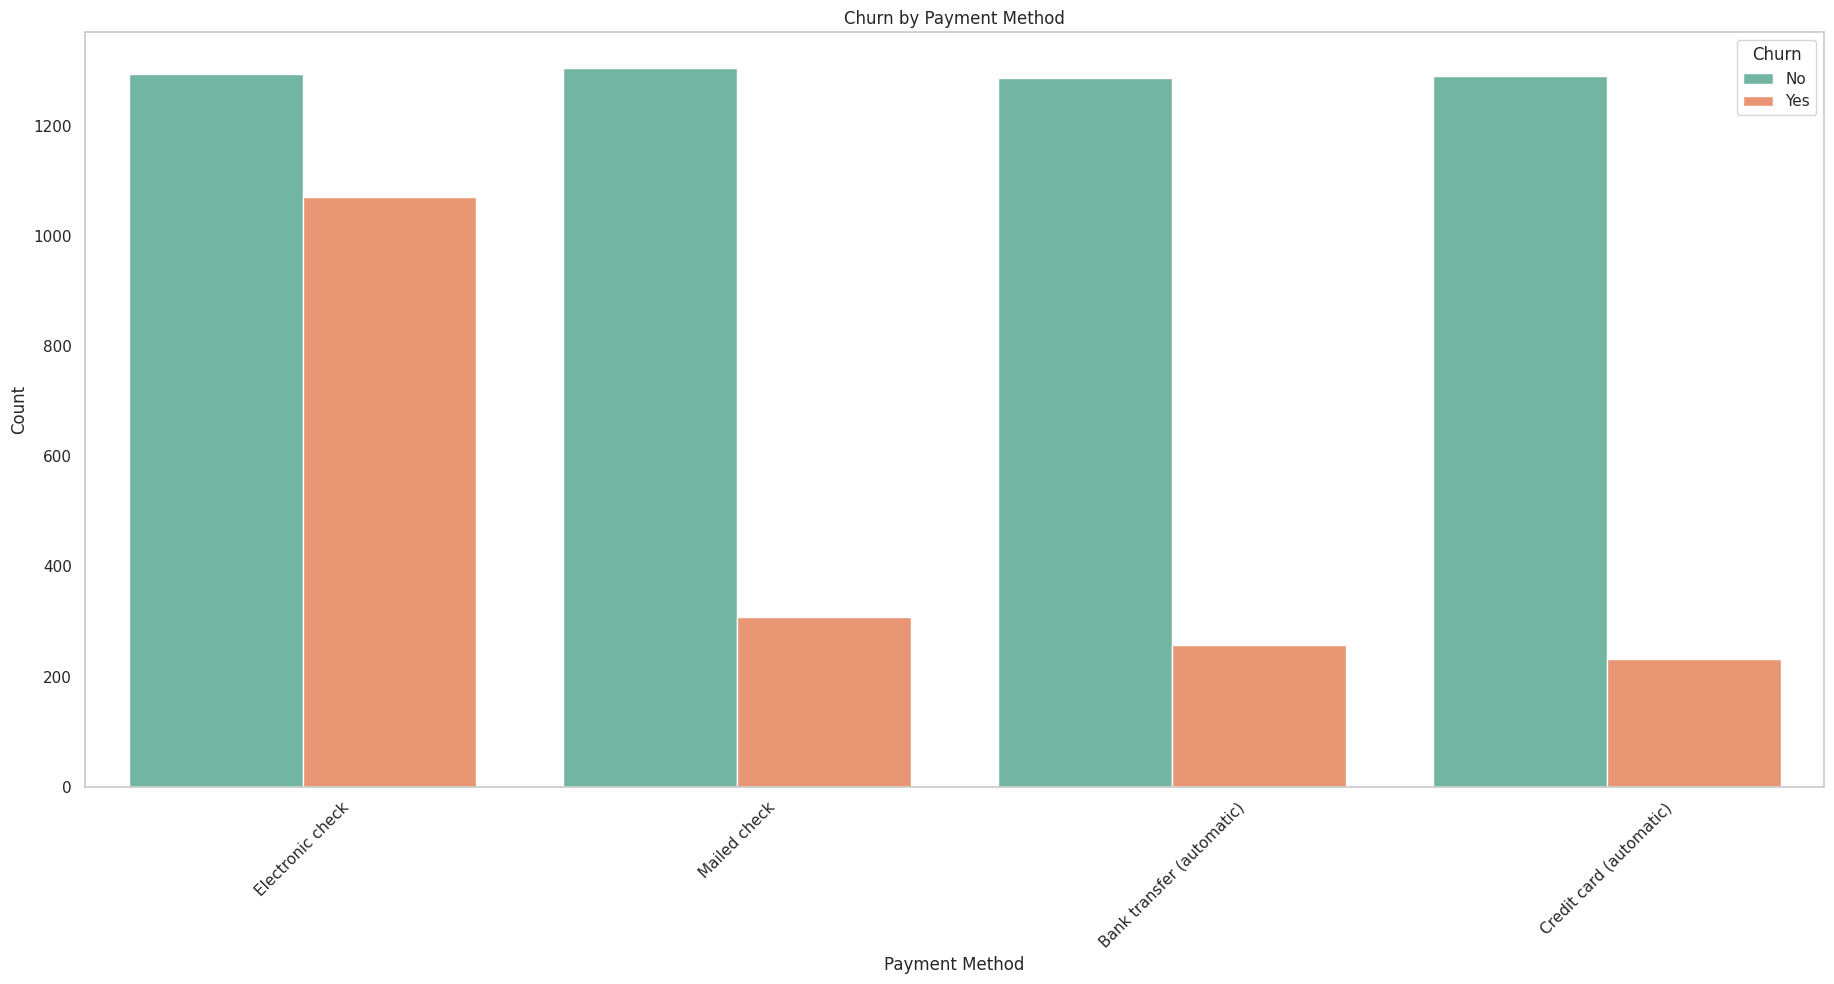

In [22]:
# Churn count by payment method
plt.figure(figsize=(18.5, 10))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

## Data cleaning

In [23]:
# Deleting columns
data.drop(['customerID', 'TotalCharges'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [24]:
# Checking for blank/missing data
blank_data = data.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64


Total data missing in DataFrame: 0


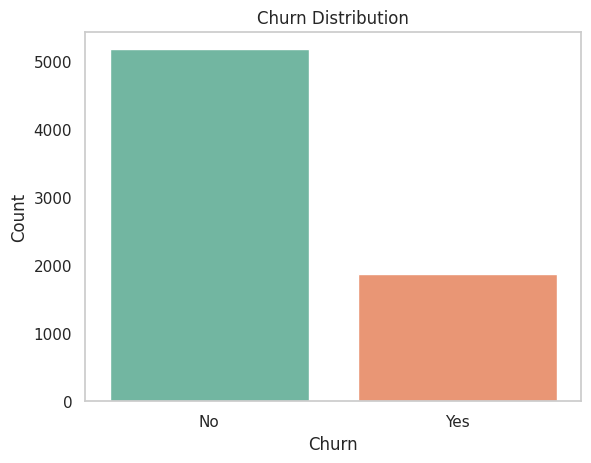

In [25]:
# Print the total number of missing values in the entire DataFrame.
total_missing = data.isnull().sum().sum() 
print("Total data missing in DataFrame:", total_missing)

# Checking the target column with plot
sns.countplot(x="Churn", data=data, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(False)
plt.show()

## Feature Engineering

In [26]:
from sklearn.preprocessing import LabelEncoder 

# Creating the Label encoder 
Label_pre = LabelEncoder() 
data_cols=data.select_dtypes(exclude=['int','float']).columns 
label_col =list(data_cols) 

# Applying encoder 
data[label_col]= data[label_col].apply(lambda col:Label_pre.fit_transform(col)) 

# Saved dataset with Label Encoder
data.to_csv("dataset_LabelEncoder.csv")

# Viewing 
Label_pre

LabelEncoder()

In [27]:
# Viewing
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [28]:
# Split the data into features (X) and target (y)
X = data.drop("Churn", axis=1) # Drop the target column to get the features
y = data["Churn"] # Set the target column

X.shape

(7043, 18)

In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (5634, 18)
Rows and columns of training data y_train: (5634, 18)


In [30]:
 !pip install tqdm
!pip install xgboost
!pip install lightgbm


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [31]:
# Importing libraries
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm
import matplotlib.pyplot as plt

# Metrics and model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report


# Model dictionary
models = { 
    # Logistic Regression model
    "Logistic Regression": LogisticRegression(),
    
    # Naive Bayes model
    "Naive Bayes": GaussianNB(),
       
    # Decision Tree model
    "Decision Tree Classifier": DecisionTreeClassifier(),
    
    # Random Forest model
    "Random Forest": RandomForestClassifier(),
    
    # AdaBoost model
    "AdaBoost": AdaBoostClassifier(),
    
    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),
    
    # XGBoost model
    "XGBoost": XGBClassifier(),
    
    # LightGBM model
    "LightGBM": LGBMClassifier()}


# Model training with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Model training
    model.fit(X_train, y_train)

    # Model score
    score = model.score(X_test, y_test)
    
    # Model prediction
    model_pred = model.predict(X_test)

    # Displaying the models
    print()
    tqdm.write(f"Model: {name} has an Accuracy of {score:.2%}")

Training models:  38%|██████████████████████▏                                    | 3/8 [00:00<00:00, 23.28it/s]


Model: Logistic Regression has an Accuracy of 81.83%

Model: Naive Bayes has an Accuracy of 75.80%

Model: Decision Tree Classifier has an Accuracy of 71.26%


Training models:  38%|██████████████████████▏                                    | 3/8 [00:00<00:00, 23.28it/s]


Model: Random Forest has an Accuracy of 79.63%


Training models:  38%|██████████████████████▏                                    | 3/8 [00:00<00:00, 23.28it/s]


Model: AdaBoost has an Accuracy of 79.91%


Training models:  75%|████████████████████████████████████████████▎              | 6/8 [00:01<00:00,  3.35it/s]


Model: Gradient Boosting has an Accuracy of 81.05%

Model: XGBoost has an Accuracy of 78.21%


Training models: 100%|███████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.99it/s]

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418

Model: LightGBM has an Accuracy of 79.77%


## Metrics and confusion matrix report classification


Machine Learning Model: Logistic Regression





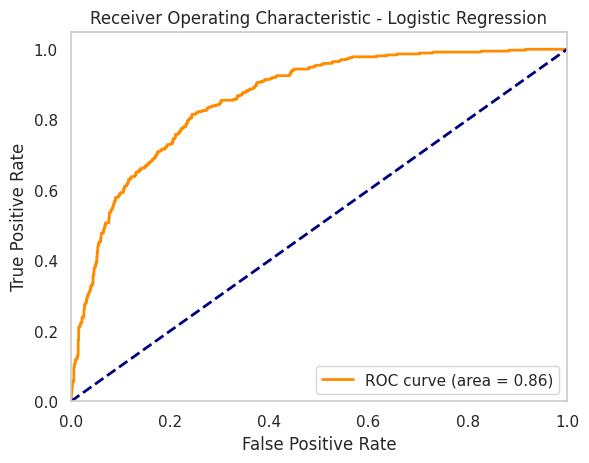



Accuracy: 0.8183108587650816




Confusion matrix 

 [[935 101]
 [155 218]]

True Positives (TP) =  935

True Negatives (TN) =  218

False Positives (FP) =  101

False Negatives (FN) =  155




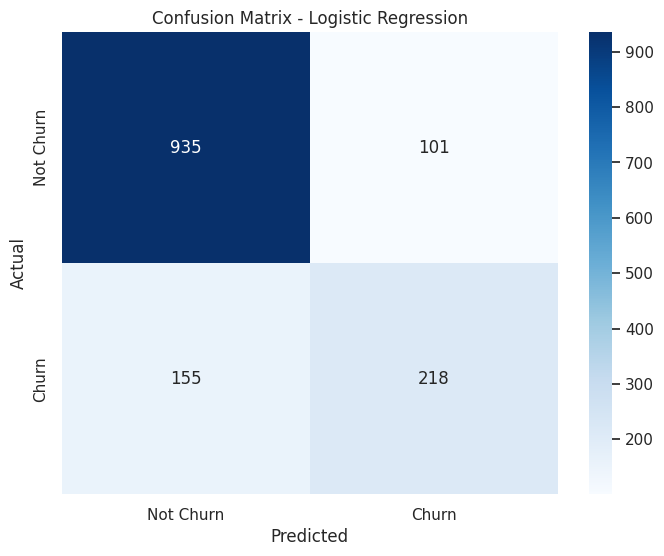



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Machine Learning Model: Naive Bayes





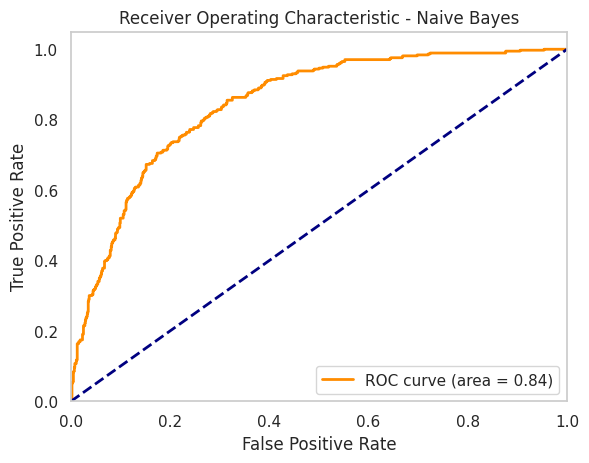



Accuracy: 0.7579843860894251




Confusion matrix 

 [[780 256]
 [ 85 288]]

True Positives (TP) =  780

True Negatives (TN) =  288

False Positives (FP) =  256

False Negatives (FN) =  85




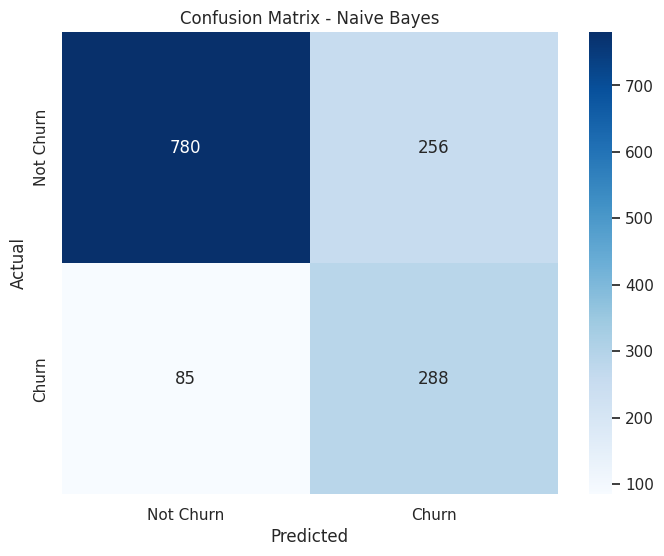



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409


Machine Learning Model: Decision Tree Classifier





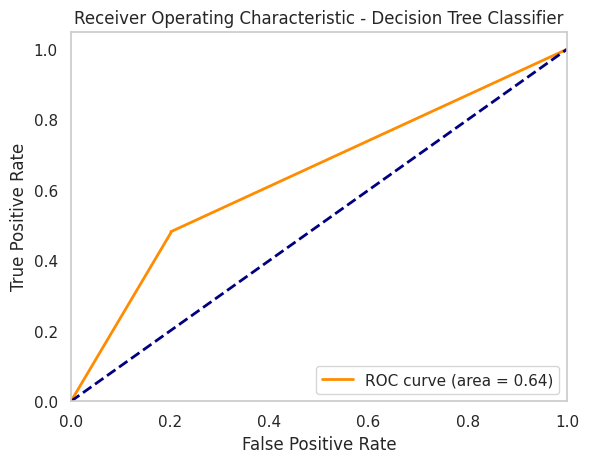



Accuracy: 0.7139815471965933




Confusion matrix 

 [[828 208]
 [195 178]]

True Positives (TP) =  828

True Negatives (TN) =  178

False Positives (FP) =  208

False Negatives (FN) =  195




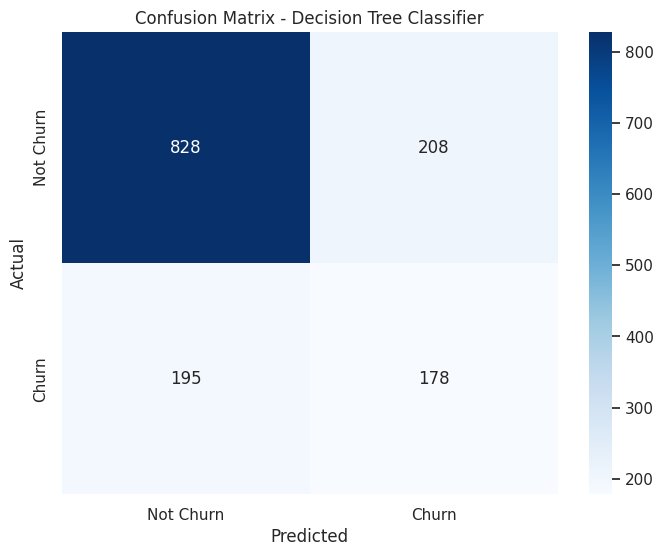



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.48      0.47       373

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409


Machine Learning Model: Random Forest





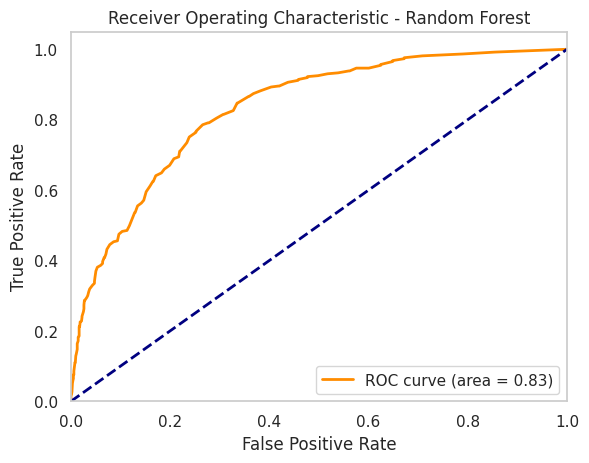



Accuracy: 0.78708303761533




Confusion matrix 

 [[939  97]
 [203 170]]

True Positives (TP) =  939

True Negatives (TN) =  170

False Positives (FP) =  97

False Negatives (FN) =  203




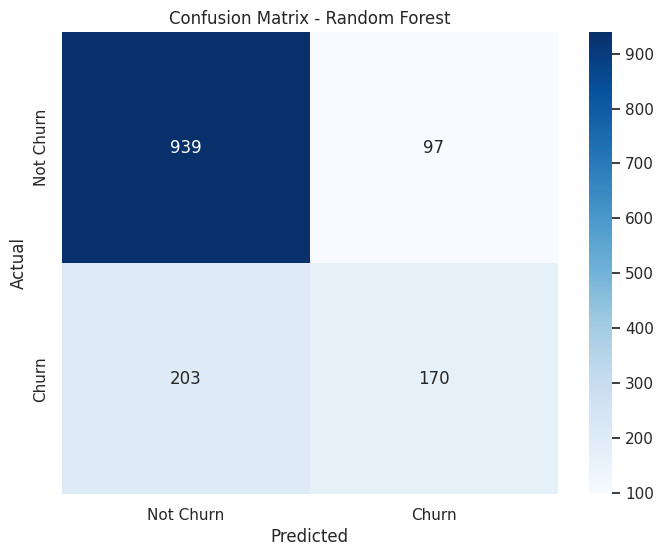



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409


Machine Learning Model: AdaBoost





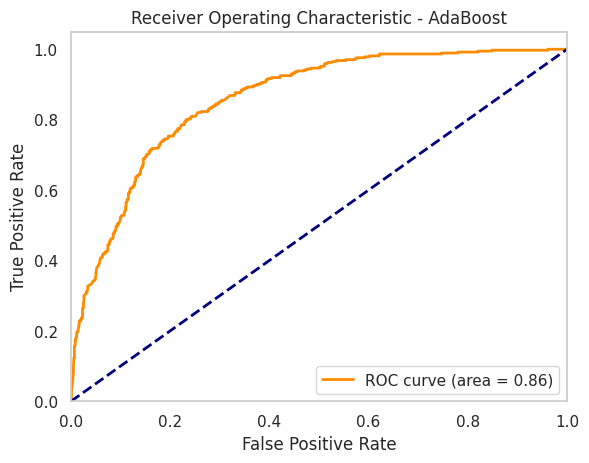



Accuracy: 0.7991483321504613




Confusion matrix 

 [[930 106]
 [177 196]]

True Positives (TP) =  930

True Negatives (TN) =  196

False Positives (FP) =  106

False Negatives (FN) =  177




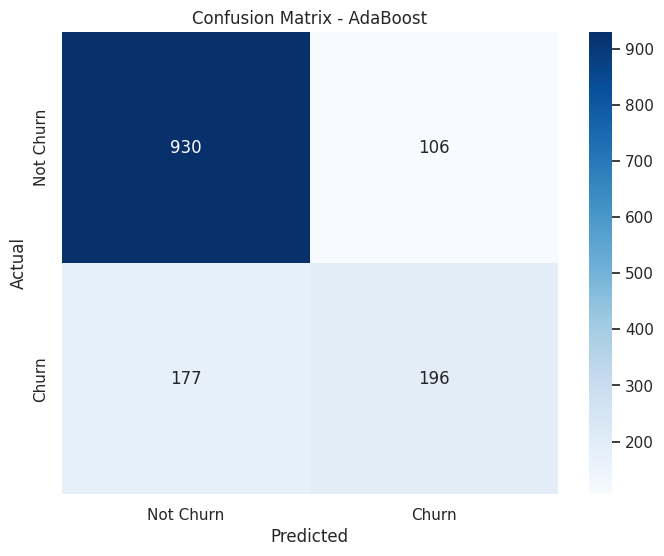



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Machine Learning Model: Gradient Boosting





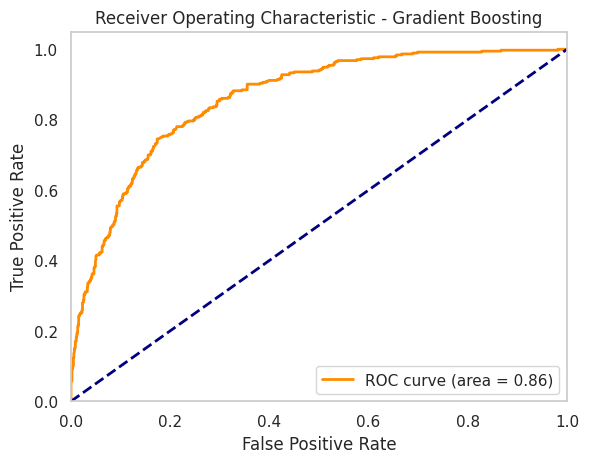



Accuracy: 0.8105039034776437




Confusion matrix 

 [[940  96]
 [171 202]]

True Positives (TP) =  940

True Negatives (TN) =  202

False Positives (FP) =  96

False Negatives (FN) =  171




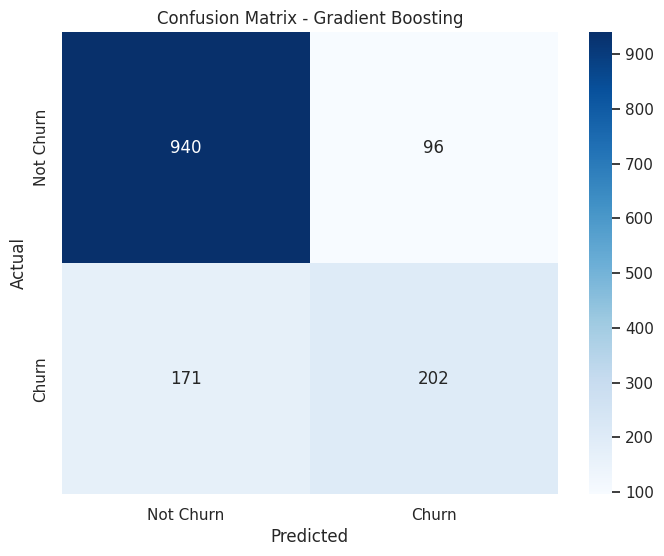



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Machine Learning Model: XGBoost





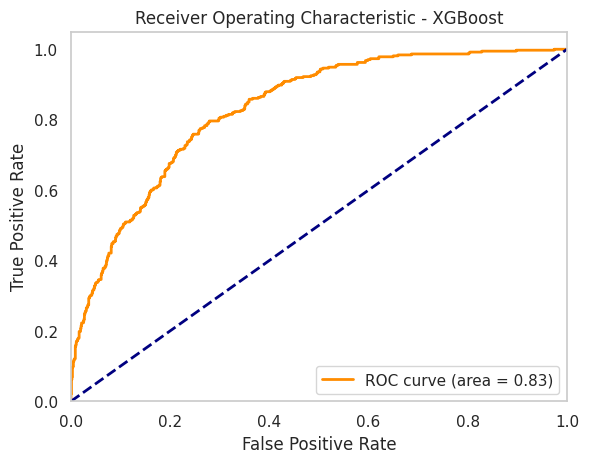



Accuracy: 0.7821149751596878




Confusion matrix 

 [[910 126]
 [181 192]]

True Positives (TP) =  910

True Negatives (TN) =  192

False Positives (FP) =  126

False Negatives (FN) =  181




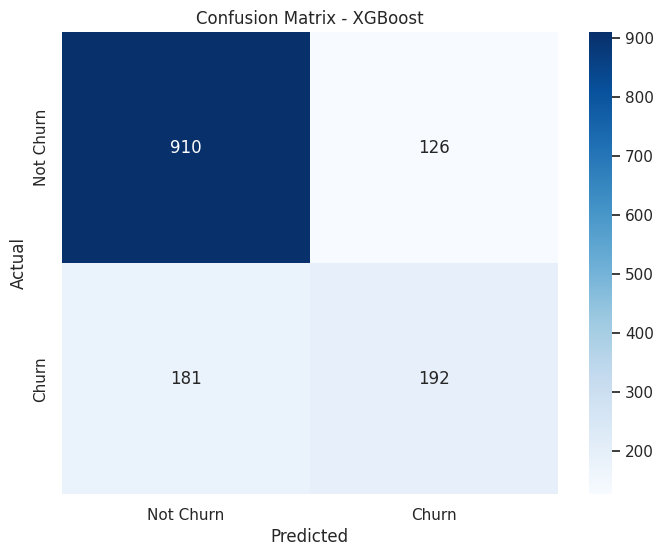



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.60      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418

Machine Learning Model: LightGBM





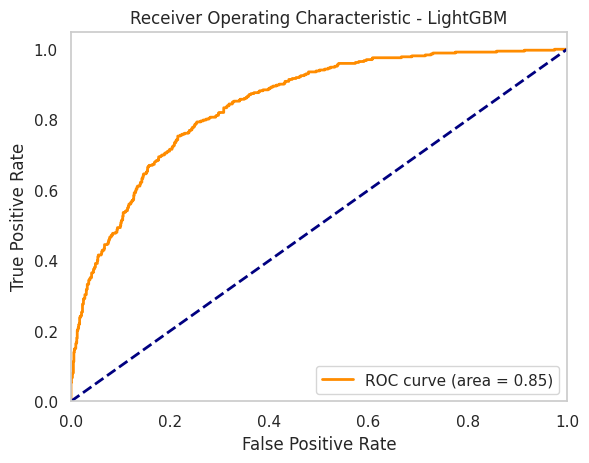



Accuracy: 0.7977288857345636




Confusion matrix 

 [[924 112]
 [173 200]]

True Positives (TP) =  924

True Negatives (TN) =  200

False Positives (FP) =  112

False Negatives (FN) =  173




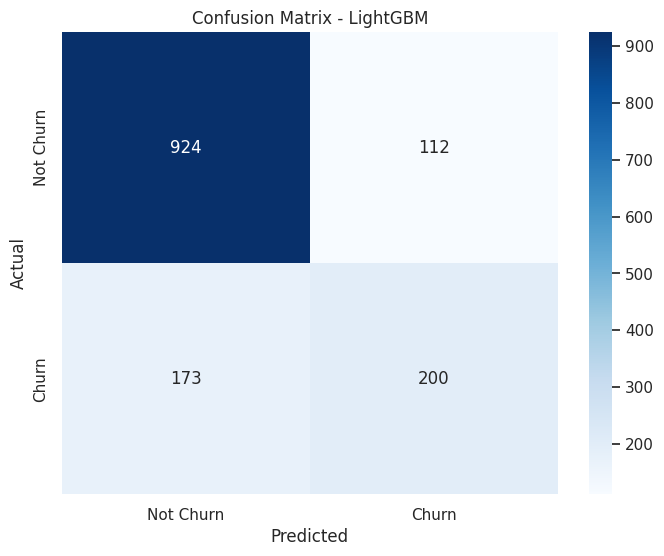



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [32]:
# Iterating over each model
for name, model in models.items():

# Training the model
    model.fit(X_train, y_train)

# Prediction on the test set
    y_pred = model.predict(X_test)

    print()
    print("Machine Learning Model:", name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print()
    print()
    
# Plotting the ROC curve
    print()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(name))
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    print()
    print()
    
# Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print()
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print()
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives (TP) = ', cm[0,0])
    print('\nTrue Negatives (TN) = ', cm[1,1])
    print('\nFalse Positives (FP) = ', cm[0,1])
    print('\nFalse Negatives (FN) = ', cm[1,0])
    print()
    print()
    
# Plotting the confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted')
    plt.ylabel('Actual') 
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.show()
    print()
    print()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred)) 

## Dictionary to store the metrics

In [33]:
# Dictionary to store metrics
metrics_results = {'Model': [],
                   'Accuracy': [],
                   'Precision': [],
                   'Recall': [],
                   'F1-Score': [],
                   'Support': []
                  }

# Iterating over each model
for name, model in models.items():
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Prediction on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculating other metrics using classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing accuracy and other metrics results in the dictionary
    metrics_results['Model'].append(name)
    metrics_results['Accuracy'].append(acc)
    metrics_results['Precision'].append(report['weighted avg']['precision'])
    metrics_results['Recall'].append(report['weighted avg']['recall'])
    metrics_results['F1-Score'].append(report['weighted avg']['f1-score'])
    metrics_results['Support'].append(report['weighted avg']['support'])
    
    # Creating DataFrame with the results
df_metrics = pd.DataFrame(metrics_results)

# Displaying the DataFrame sorted by the accuracy column in descending order
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)
df_metrics_sorted.head()

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


,Model,Accuracy,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.818311,0.811626,0.818311,0.813529,1409.0
5,Gradient Boosting,0.810504,0.801549,0.810504,0.803223,1409.0
4,AdaBoost,0.799148,0.789519,0.799148,0.791912,1409.0
7,LightGBM,0.797729,0.789015,0.797729,0.791615,1409.0
3,Random Forest,0.791341,0.778727,0.791341,0.780552,1409.0


## Saving the models

In [34]:
# Importing libraries
from tqdm import tqdm
import pickle

# Directory to save the models
models_dir = "./models/"

# Create the folder if it does not exist
os.makedirs(models_dir, exist_ok=True)

# Dictionary of models
models = {
    
    # Logistic Regression model
    "Logistic Regression": LogisticRegression(),
    
    # Naive Bayes model
    "Naive Bayes": GaussianNB(),
         
    # Decision Tree model
    "Decision Tree Classifier": DecisionTreeClassifier(),
         
    # Random Forest model
    "Random Forest": RandomForestClassifier(),
            
    # AdaBoost model
    "AdaBoost": AdaBoostClassifier(),
           
    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),
            
     # XGBoost model
    "XGBoost": XGBClassifier(),
    
    # LightGBM model
    "LightGBM": LGBMClassifier()
}

# Training models with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Training the model
    model.fit(X_train, y_train)

    # Model score
    score = model.score(X_test, y_test)
    
    # Save the trained model with pickle
    model_path = os.path.join(models_dir, f"{name}_model.pkl")
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    
    # Model prediction
    model_pred = model.predict(X_test)

    # Displaying the models
    print()
    tqdm.write(f"Model: {name} has Accuracy {score:.2%} and was saved as {model_path}")

Training models:   0%|                                                                   | 0/8 [00:00<?, ?it/s]


Model: Logistic Regression has Accuracy 81.83% and was saved as ./models/Logistic Regression_model.pkl

Model: Naive Bayes has Accuracy 75.80% and was saved as ./models/Naive Bayes_model.pkl


Training models:  38%|██████████████████████▏                                    | 3/8 [00:00<00:00, 27.23it/s]


Model: Decision Tree Classifier has Accuracy 71.19% and was saved as ./models/Decision Tree Classifier_model.pkl


Training models:  38%|██████████████████████▏                                    | 3/8 [00:00<00:00, 27.23it/s]


Model: Random Forest has Accuracy 78.14% and was saved as ./models/Random Forest_model.pkl


Training models:  38%|██████████████████████▏                                    | 3/8 [00:00<00:00, 27.23it/s]


Model: AdaBoost has Accuracy 79.91% and was saved as ./models/AdaBoost_model.pkl


Training models:  75%|████████████████████████████████████████████▎              | 6/8 [00:01<00:00,  3.35it/s]


Model: Gradient Boosting has Accuracy 81.05% and was saved as ./models/Gradient Boosting_model.pkl

Model: XGBoost has Accuracy 78.21% and was saved as ./models/XGBoost_model.pkl
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


Training models: 100%|███████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.44it/s]


Model: LightGBM has Accuracy 79.77% and was saved as ./models/LightGBM_model.pkl


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
import mlflow
import warnings
warnings.filterwarnings("ignore")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment('experiment-1')
with mlflow.start_run(nested=True) as run:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mlflow.log_param("max_iter", 1000)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    
    mlflow.sklearn.log_model(model, "logistic_regression_model")
mlflow.end_run()

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


2024/08/08 18:40:50 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/08 18:40:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run thundering-crab-324 at: http://127.0.0.1:5000/#/experiments/1/runs/5a7a2261eac540d39e30458c2b8a6ff0.
2024/08/08 18:40:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


In [52]:
def log_system_metrics():
    cpu_percent = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_io = psutil.disk_io_counters()
    
    mlflow.log_metric("cpu_percent", cpu_percent)
    mlflow.log_metric("memory_percent", memory_info.percent)
    mlflow.log_metric("disk_read_bytes", disk_io.read_bytes)
    mlflow.log_metric("disk_write_bytes", disk_io.write_bytes)

In [54]:
import psutil
import time
import os
import mlflow
mlflow.set_experiment('experiment-1_with_systemmetrics')
with mlflow.start_run(nested=True) as run:
    start_time = time.time()
    
    # Log initial system metrics
    log_system_metrics()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Log system metrics after training
    log_system_metrics()
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Log system metrics after prediction
    log_system_metrics()
    
    # Log parameters
    mlflow.log_param("max_iter", 1000)
    
    # Log metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # Log the model
    mlflow.sklearn.log_model(model, "logistic_regression_modelwithsystemmetrics")
    

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


2024/08/08 18:41:49 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/08 18:41:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run abundant-auk-657 at: http://127.0.0.1:5000/#/experiments/2/runs/11035af278e3480b97cf211cb6235a79.
2024/08/08 18:41:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2.


In [56]:
import mlflow
import mlflow.sklearn
import time

# Start the MLflow run
with mlflow.start_run() as run:
    start_time = time.time()
    
    # Train and log the model
    model.fit(X_train, y_train)
    mlflow.sklearn.log_model(model, "logistic_regression_model")
    
    # Get the run ID
    run_id = run.info.run_id
    
    # Calculate and log metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # Register the model
    model_uri = f"runs:/{run_id}/logistic_regression_model"
    mlflow.register_model(model_uri=model_uri, name="LogisticRegressionModelwith_systemmetrics")
    
    # Log additional artifacts or metrics
    mlflow.log_artifacts("artifact_dir")  # Assuming artifact_dir contains some artifacts
    end_time = time.time()
    total_time = end_time - start_time
    mlflow.log_metric("training_time", total_time)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"f1_score: {f1:.4f}")
    print(f"Training time: {total_time:.2f} seconds")

# The run will end here automatically, so no need to call mlflow.end_run()


[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


2024/08/08 18:44:04 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'LogisticRegressionModelwith_systemmetrics' already exists. Creating a new version of this model...
2024/08/08 18:44:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegressionModelwith_systemmetrics, version 3
Created version '3' of model 'LogisticRegressionModelwith_systemmetrics'.
2024/08/08 18:44:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-swan-977 at: http://127.0.0.1:5000/#/experiments/2/runs/46ee151d05eb4524896233086533ce32.
2024/08/08 18:44:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2.


Accuracy: 0.7977
Precision: 0.6410
Recall: 0.5362
f1_score: 0.5839
Training time: 1.99 seconds


In [57]:
import mlflow
import mlflow.sklearn
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Model dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

# Start the main experiment
mlflow.set_experiment('model_comparison_experiment')

# Model training with tqdm and MLflow logging
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    with mlflow.start_run(run_name=name):
        # Model training
        model.fit(X_train, y_train)

        # Model prediction
        y_pred = model.predict(X_test)

        # Model evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Log parameters and metrics
        mlflow.log_param("model_type", name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Log the model
        mlflow.sklearn.log_model(model, f"{name}_model")

        # Get the current run ID
        run_id = mlflow.active_run().info.run_id


        # Register the model
        model_uri = f"runs:/{run_id}/{name}_model"
        mlflow.register_model(model_uri=model_uri, name=f"{name}_RegisteredModel")

        # Display model performance
        tqdm.write(f"Model: {name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# End the experiment
mlflow.end_run()


Training models:   0%|                                                                   | 0/8 [00:00<?, ?it/s]2024/08/08 18:45:28 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'Logistic Regression_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression_RegisteredModel, version 2
Created version '2' of model 'Logistic Regression_RegisteredModel'.
Training models:   0%|                                                                   | 0/8 [00:02<?, ?it/s]2024/08/08 18:45:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/3/runs/ac06d2eee5b54411a73cfc4f9ffae265.
2024/08/08 18:45:28 INFO mlflow.tracking._tracking_service

Model: Logistic Regression - Accuracy: 0.8183, Precision: 0.6834, Recall: 0.5845, F1 Score: 0.6301


2024/08/08 18:45:30 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'Naive Bayes_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Naive Bayes_RegisteredModel, version 2
Created version '2' of model 'Naive Bayes_RegisteredModel'.
Training models:  12%|███████▍                                                   | 1/8 [00:03<00:14,  2.09s/it]2024/08/08 18:45:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Naive Bayes at: http://127.0.0.1:5000/#/experiments/3/runs/68c49924ffbf43ad9bbff40a9e72bd18.
2024/08/08 18:45:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.
Training models:  25%|██████████████▊                                    

Model: Naive Bayes - Accuracy: 0.7580, Precision: 0.5294, Recall: 0.7721, F1 Score: 0.6281


2024/08/08 18:45:32 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'Decision Tree Classifier_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision Tree Classifier_RegisteredModel, version 2
Created version '2' of model 'Decision Tree Classifier_RegisteredModel'.
Training models:  25%|██████████████▊                                            | 2/8 [00:05<00:11,  1.89s/it]2024/08/08 18:45:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree Classifier at: http://127.0.0.1:5000/#/experiments/3/runs/8c3e6bf45f754a6bb35be9bb0cc923b3.
2024/08/08 18:45:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.
Training models:  38%

Model: Decision Tree Classifier - Accuracy: 0.7033, Precision: 0.4425, Recall: 0.4638, F1 Score: 0.4529


2024/08/08 18:45:34 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'Random Forest_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest_RegisteredModel, version 2
Created version '2' of model 'Random Forest_RegisteredModel'.
Training models:  38%|██████████████████████▏                                    | 3/8 [00:08<00:09,  1.89s/it]2024/08/08 18:45:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/3/runs/e2c5264c8032496cb70b043dbadbf87a.
2024/08/08 18:45:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.
Training models:  50%|█████████████████████████████▌             

Model: Random Forest - Accuracy: 0.7864, Precision: 0.6304, Recall: 0.4665, F1 Score: 0.5362


2024/08/08 18:45:37 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'AdaBoost_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: AdaBoost_RegisteredModel, version 2
Created version '2' of model 'AdaBoost_RegisteredModel'.
Training models:  50%|█████████████████████████████▌                             | 4/8 [00:10<00:08,  2.18s/it]2024/08/08 18:45:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run AdaBoost at: http://127.0.0.1:5000/#/experiments/3/runs/8f59a7b9b15447d696568ace803048bb.
2024/08/08 18:45:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.
Training models:  62%|████████████████████████████████████▉                      | 5/

Model: AdaBoost - Accuracy: 0.7991, Precision: 0.6490, Recall: 0.5255, F1 Score: 0.5807


2024/08/08 18:45:39 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'Gradient Boosting_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Gradient Boosting_RegisteredModel, version 2
Created version '2' of model 'Gradient Boosting_RegisteredModel'.
Training models:  62%|████████████████████████████████████▉                      | 5/8 [00:13<00:06,  2.14s/it]2024/08/08 18:45:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Gradient Boosting at: http://127.0.0.1:5000/#/experiments/3/runs/35bd9c41b7044678a1ddeea4c74f724a.
2024/08/08 18:45:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.
Training models:  75%|███████████████████████████

Model: Gradient Boosting - Accuracy: 0.8105, Precision: 0.6779, Recall: 0.5416, F1 Score: 0.6021


2024/08/08 18:45:41 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'XGBoost_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost_RegisteredModel, version 2
Created version '2' of model 'XGBoost_RegisteredModel'.
Training models:  75%|████████████████████████████████████████████▎              | 6/8 [00:14<00:04,  2.32s/it]2024/08/08 18:45:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/3/runs/d6d0e7757dc94a9ba0818b627f187001.
2024/08/08 18:45:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.
Training models:  88%|███████████████████████████████████████████████████▋       | 7/8 [0

Model: XGBoost - Accuracy: 0.7821, Precision: 0.6038, Recall: 0.5147, F1 Score: 0.5557
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


2024/08/08 18:45:43 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Registered model 'LightGBM_RegisteredModel' already exists. Creating a new version of this model...
2024/08/08 18:45:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LightGBM_RegisteredModel, version 2
Created version '2' of model 'LightGBM_RegisteredModel'.
Training models:  88%|███████████████████████████████████████████████████▋       | 7/8 [00:17<00:02,  2.19s/it]2024/08/08 18:45:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run LightGBM at: http://127.0.0.1:5000/#/experiments/3/runs/f19d30de23a643fab0e7ee98cb7c567a.
2024/08/08 18:45:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.
Training models: 100%|███████████████████████████████████████████████████████████| 8/

Model: LightGBM - Accuracy: 0.7977, Precision: 0.6410, Recall: 0.5362, F1 Score: 0.5839


In [58]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Start a new MLflow run
mlflow.set_experiment('Retraining_experiment')
with mlflow.start_run(run_name="RandomForest_Retrained"):

    # Fit the model with GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Log the best parameters and metrics
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # Log the retrained model
    mlflow.sklearn.log_model(best_model, "RandomForest_Retrained_Model")
    
    # Register the retrained model
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/RandomForest_Retrained_Model"
    mlflow.register_model(model_uri=model_uri, name="RandomForest_Retrained_RegisteredModel")
    
    # Display model performance
    print(f"Retrained Model Accuracy: {accuracy:.4f}")
    print(f"Retrained Model Precision: {precision:.4f}")
    print(f"Retrained Model Recall: {recall:.4f}")
    print(f"Retrained Model f1_score: {f1:.4f}")

# End the run
mlflow.end_run()


2024/08/08 18:59:45 INFO mlflow.tracking.fluent: Experiment with name 'Retraining_experiment' does not exist. Creating a new experiment.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tot

2024/08/08 19:10:29 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Successfully registered model 'RandomForest_Retrained_RegisteredModel'.
2024/08/08 19:10:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForest_Retrained_RegisteredModel, version 1
Created version '1' of model 'RandomForest_Retrained_RegisteredModel'.
2024/08/08 19:10:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_Retrained at: http://127.0.0.1:5000/#/experiments/4/runs/e76ec57626334e7d9dfd92209ba3aae9.
2024/08/08 19:10:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4.


Retrained Model Accuracy: 0.8062
Retrained Model Precision: 0.6736
Retrained Model Recall: 0.5201
Retrained Model f1_score: 0.5870
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=3